<a href="https://colab.research.google.com/github/rcortezk9/tensorflow_lessons/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numberical varialbe based on some other combination of  vvariables, even shorter... predictin a number.

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__) # print out the version of TensorFlow

2.4.1


## Creating data to view and fit

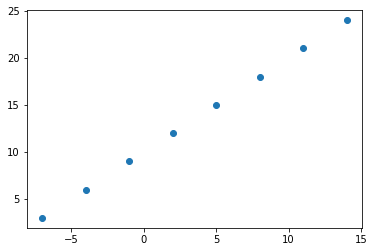

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes 

In [ ]:
# Create a demo tensor for our housing price prediction problem

house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)

X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape 
output_shape = y[0].shape 
input_shape, output_shape

(TensorShape([]), TensorShape([]))

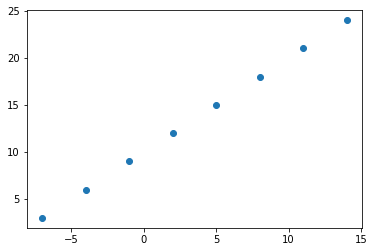

In [ ]:
plt.scatter(X,y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compilling a model** - define the loss function (in other words, the function which tells our model how wron it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performace of our model).
3. **Fitting a model** - letting the model try to fiind patterns between X and y (features and labels).

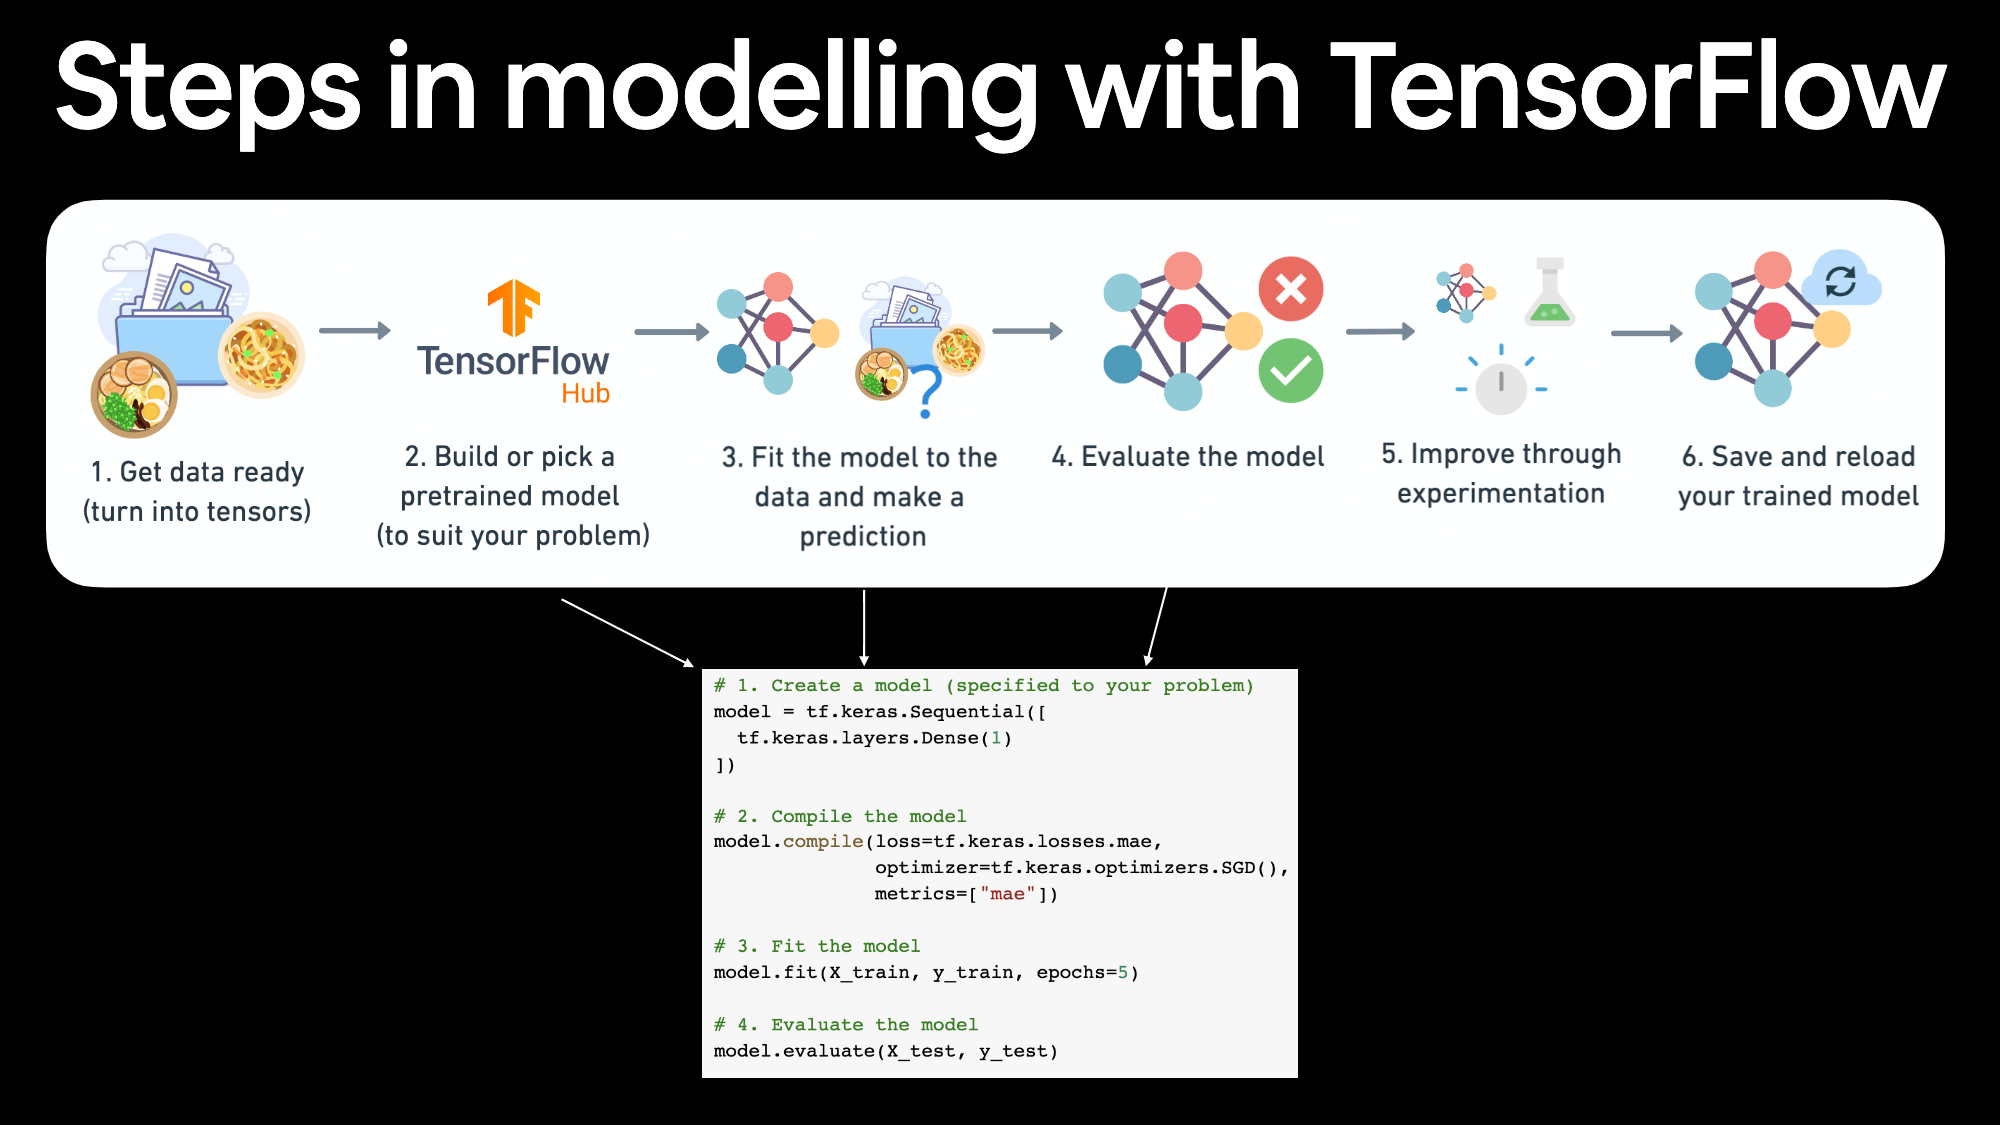

In [ ]:
# Set random seed
tf.random.set_seed(42)

#1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # stochasitc gradient descent
              metrics=['mae'])

#3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 485ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try and make a prediction with our trained model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [ ]:
y_pred + 11

array([[23.71602]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number fo hidden units (all called neurons) within each or the hiden layers, change the activation function of each layer.
2. **Compiling a model** = here we might change the optimization function or perhaps the l**earning rate** of the optimization function
3. **Fitting a model** - here we might fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from). 

In [ ]:
# Let's rebuild our model

#1. Create the model
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model (this time we'll train for the longer)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 329ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 6m

In [ ]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's see if our model's predictions has improved...
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [ ]:
# Let's see what we can do to make our model better

#1. Create the model (this time with an extra model hidden layer with 100 hidden units)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss='mae', # To make it shorter
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model (this time we'll train for the longer)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 305ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - l

In [ ]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's try to make a prediction
model.predict([17.0]) # outcome is 31.7 and the model might be over fitting now.

array([[31.223137]], dtype=float32)

In [ ]:
# Let's see what we can do to make our model better

#1. Create the model (this time with an extra model hidden layer with 100 hidden units)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss='mae', # To make it shorter
              optimizer=tf.keras.optimizers.Adam(lr=0.01), # LR the best hyper parameter
              metrics=['mae'])

# 3. Fit the model (this time we'll train for the longer)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 372ms/step - loss: 12.2895 - mae: 12.2895
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.5828 - mae: 11.5828
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 10.8658 - mae: 10.8658
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.1378 - mae: 10.1378
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 9.3973 - mae: 9.3973
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 8.6426 - mae: 8.6426
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 7.8717 - mae: 7.8717
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 7.0828 - mae: 7.0828
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 6.8696 - mae: 6.8696
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 7.2795 - mae: 7.2795
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - lo

In [ ]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's try to make a prediction 
model.predict([17.0])

array([[27.890127]], dtype=float32)

## Evaluting a model

In practice, a typical workflow you'll go through when building nueural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> ...
```

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the modle - how do the predictions of a model line up against the ground truth (the original labels)?

In [ ]:
# Make a bigger dataset

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

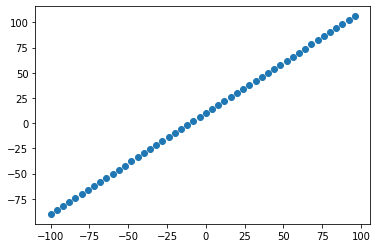

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The  3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* Test set - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available. 

**Generalization** - The ability for a machine learning model to perform well on data it hasn't seen before.

In [ ]:
# Check the lenght of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again!

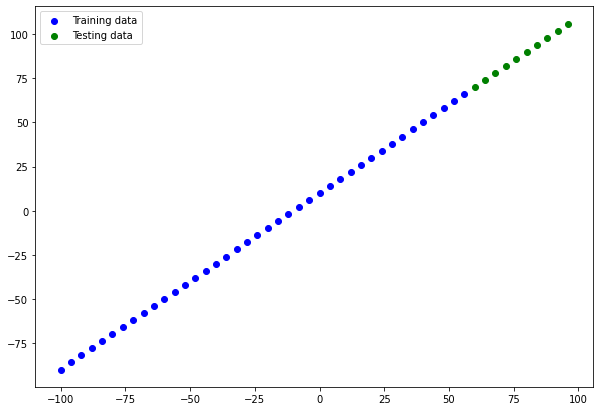

In [ ]:
plt.figure(figsize=(10, 7))
# plot training data in blue
plt.scatter(X_train, y_train, c='b', label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label="Testing data")
# Show a legend
plt.legend();

In [ ]:
# Let's have a look at how to build a neural network for our data.

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
# model.fit(X_train, y_train, epochs=100) # done on purpose.



In [ ]:
# model.summary() gave us a value error we would need to use input_shape

In [ ]:
# Let's creat a model which builds autoomatically by defining the input_shapte argument in the first layer
tf.random.set_seed(42)

# 1. Create a model 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
  tf.keras.layers.Dense(1, name='output_layer')
], name="model_1")

# 2. compile the model 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable params - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when your parameters from other models dureing **transfer learning**).

📖 **Resource:** For a more in-depth overview of the trainable parameters with in a layer, check out MIT's introduction to deep learning video.

🛠 **Exercise:** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`

In [ ]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
 # Get a summary of our model 
 model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


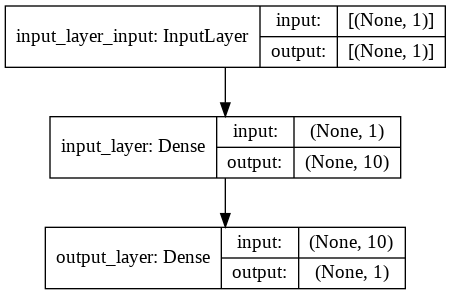

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Oftena you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note:** if you feel like you're going to reuse some kind of functionality in the future, it's good idea to turn it into a function.

In [ ]:
# Let's create a ploting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    """
    Plots training data, test data and compares predictions to ground truth
    """

    plt.figure(figsize=(10, 7))
    # plot training data in blue
    plt.scatter(train_data, train_labels, c='b', label="Training data")
    # Plot test data in green
    plt.scatter(test_data, test_labels, c='g', label="Testing data")
    # Plot model's precitions in red
    plt.scatter(test_data, predictions, c='r', label='Predictions')
    # Show a legend
    plt.legend();

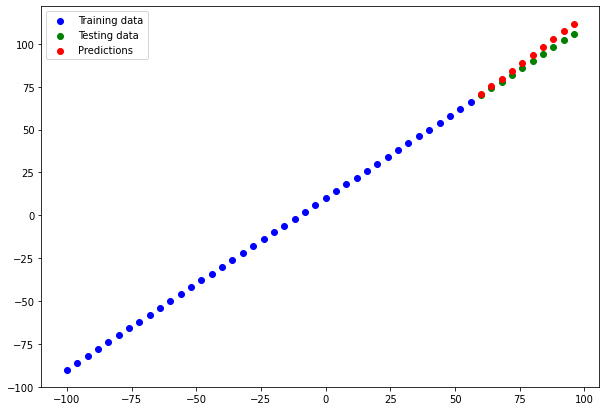

In [ ]:
plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred)

### Evalution our model's prediction with regression evaluation metrics

Depending on the problem you are working on, there will be different evaluation metrices to evalutate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "one average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors" 

In [ ]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 133ms/step - loss: 3.1969 - mae: 3.1969


[3.1969451904296875, 3.1969451904296875]

In [ ]:
# calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)>

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [ ]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [ ]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_test,
                                          y_pred=tf.squeeze(y_pred))
    
def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_test,
                                         y_pred=tf.squeeze(y_pred))

### Running Experiments to imporve our model

```
Build a model -> fit it-> evaluate it -> tweak it -> fit it-> evaluate it -> tweak it -> etc..
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relations ships beetween featuers and labels).
2. Make your model larger (useing a more complex model) - this might come in the form of more layers or more hidden units in each layer. 
3. Train for longer - give your model more of a chace find pat terns in the data

Let's do 3 modelling experiments:

1. `model_1` - same as them original model, 1 layer, trained for 100 epochs.
2. `model_2 ` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build `model_1`**


In [ ]:
# Set random seed
tf.random.set_seed(42)

#1. crate the model
model_1 = tf.keras.Sequential([
   tf.keras.layers.Dense(1)                            
])

#2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit the model 
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 16.4124 - mae: 16.4124
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 11.0829 - mae: 11.0829
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1242 - mae: 11.1242
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 8.6945 - mae: 8.6945
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 9.8003 - mae: 9.8003
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 9.5263 - mae: 9.5263
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.4102 - mae: 8.4102
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.1449 - mae: 9.1449
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 19.4932 - mae: 19.4932
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 9.6061 - mae: 9.6061
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - loss:

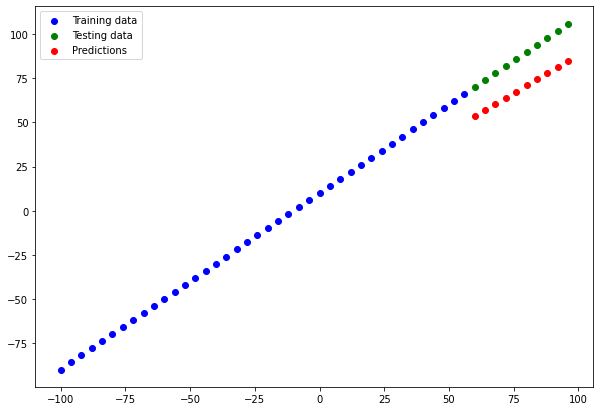

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [ ]:
# Set the random seed
tf.random.set_seed

# 1. create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mse'])

# 3. Fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 77.0856 - mse: 8550.2907
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 17.0775 - mse: 458.0873
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 20.1814 - mse: 597.2403
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 12.5192 - mse: 196.8840
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 14.1468 - mse: 243.6305
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.6317 - mse: 154.1265
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 12.8263 - mse: 216.9939
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2822 - mse: 156.1549
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 41.5593 - mse: 2650.8285
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 27.6300 - mse: 1072.2356
Epoch 11/100
2/2 [============================

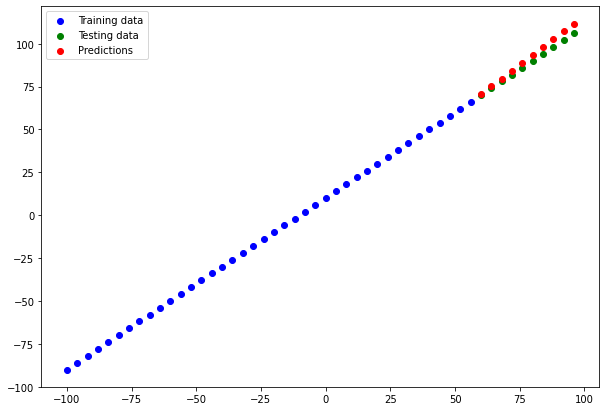

In [ ]:
# make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 evalutaion metrics 
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1109948>,
 <tf.Tensor: shape=(), dtype=float32, numpy=12.497052>)

**Build `model_2`**

*2 layers, trained for 500 epochs

In [ ]:
# Set the random seed
tf.random.set_seed

# 1. create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])

# 3. Fit the model
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 8ms/step - loss: 21.2489 - mae: 21.2489
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 22.0002 - mae: 22.0002
Epoch 3/500
2/2 [==============================] - 0s 4ms/step - loss: 29.6942 - mae: 29.6942
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 23.1934 - mae: 23.1934
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 13.3640 - mae: 13.3640
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 11.0209 - mae: 11.0209
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 12.1214 - mae: 12.1214
Epoch 8/500
2/2 [==============================] - 0s 13ms/step - loss: 10.9356 - mae: 10.9356
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 38.9254 - mae: 38.9254
Epoch 10/500
2/2 [==============================] - 0s 14ms/step - loss: 25.3178 - mae: 25.3178
Epoch 11/500
2/2 [==============================] - 0s 13

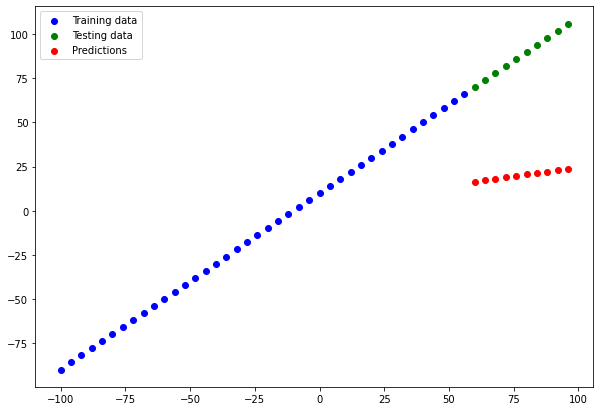

In [ ]:
# make and plot predictions of model_2
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# Calculate model_2 evalutaion metrics 
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.90955>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4696.0615>)

🔑 **Note:** You want to start with small experiments (samll models) and make sure they work an then increase their 

## Comparing the results of our experiments

We've run a few experiments, let's compare our results

Looks like `model_2` preformed the best...

In [ ]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [['model_1', mae_1.numpy(), mse_1.numpy()],
                 ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.110995,12.497052
2,model_3,67.909554,4696.061523


🔑 **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out  which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's moto: "experiment, experiment, experiment"

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doeing so, it can be tedious if you're running lots of experiments.

 Luckily, ther are tools to help us!

 📖  **Resource:** As you build more models, you'll want to look into using:

 * TesorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
 * Weights & Biases - tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard). 

## Saving our models

Savin our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

1. The SavedModel Format
2. The HDF5 format

In [ ]:
# Save model using the save model format
model_2.save('best_model_SavedModel_format')

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [ ]:
# Save model using HDF5
model_2.save('best_model_HDF5_format.h5')

## Loading in a saved model

In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model('/content/best_model_SavedModel_format')
loaded_SavedModel_format.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model('/content/best_model_HDF5_format.h5')
loaded_h5_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. You can go to the "files" tab an right click on the file you're after and click download.
2. Use code (see the cell below)
3. Save it to Google Drive by connecting Google Drive and copying it there

In [ ]:
# Dowload a file form Google Colab
from google.colab import files
files.download('/content/best_model_HDF5_format.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/tensorflow_course

In [ ]:
!ls /content/drive/MyDrive/tensorflow_course

best_model_HDF5_format.h5


### A larger example

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# read in the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
# Build a neural netwark 
# Set the random seed
tf.random.set_seed

# 1. create the model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
insurance_model.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 10276.3987 - mae: 10276.3987
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7714.0751 - mae: 7714.0751
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7059.8858 - mae: 7059.8858
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7944.1805 - mae: 7944.1805
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7706.9939 - mae: 7706.9939
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7627.9519 - mae: 7627.9519
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7624.1915 - mae: 7624.1915
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7856.2481 - mae: 7856.2481
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7715.5676 - mae: 7715.5676
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 8226.8287 - mae: 8226.82

In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8962.6367 - mae: 8962.6367


[8962.63671875, 8962.63671875]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

### Right now it looks like our model isn't performing too well... let's try and improve it!

To (try) improve our model, we'll run 2 expreiments:
1. Add an extra layer with more hidden units and use the Adam optimizer
2. Same as above but train for longer (epochs=200)
3. (insert your own experiment here)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13251.7400 - mae: 13251.7400
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12768.7726 - mae: 12768.7726
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12248.2855 - mae: 12248.2855
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 12353.0242 - mae: 12353.0242
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 11243.3972 - mae: 11243.3972
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 9718.5255 - mae: 9718.5255
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 8354.8474 - mae: 8354.8474
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7732.2964 - mae: 7732.2964
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7537.6737 - mae: 7537.6737
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7652.7184 - mae:

In [ ]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8962.6367 - mae: 8962.6367


[8962.63671875, 8962.63671875]

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 13251.7400 - mae: 13251.7400
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 12768.7726 - mae: 12768.7726
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 12248.2855 - mae: 12248.2855
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 12353.0242 - mae: 12353.0242
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 11243.3972 - mae: 11243.3972
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9718.5255 - mae: 9718.5255
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8354.8474 - mae: 8354.8474
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7732.2964 - mae: 7732.2964
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 7537.6737 - mae: 7537.6737
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 7652.7184 - mae:

In [ ]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8962.6367 - mae: 8962.6367


[8962.63671875, 8962.63671875]

Text(0.5, 0, 'epochs')

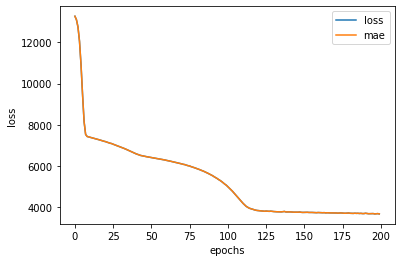

In [ ]:
# Plot history (also know as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

> 🧐  **Question:** How long should you train for?

It depends. Really... It depends on the problem you're working on. However, many people have asked this question before... so TensorFlow [EarlyStoping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop trainging once it stopes improving a certain metric.

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization

If you're not sure on which to use, you could try both and see which performs better.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To prepare our data, we can borrow a few classes from Scikit-Learn.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

# Create X and y (into features and labels)
X = insurance.drop('charges', axis=1)
y = insurance['charges']

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transform to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test) 

In [ ]:
# What does our data look like now
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! OUr data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes.

In [ ]:
# Build a neural network model to fit on our normalized data. 
tf.random.set_seed(42)

# 1. Create the modle
insurance_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model 
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13296.4671 - mae: 13296.4671
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12948.4245 - mae: 12948.4245
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12705.2201 - mae: 12705.2201
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13369.7395 - mae: 13369.7395
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13230.8567 - mae: 13230.8567
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 12995.1999 - mae: 12995.1999
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12876.1059 - mae: 12876.1059
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 13004.0395 - mae: 13004.0395
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 12508.0465 - mae: 12508.0465
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 12304.99

In [ ]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('01_neural_network_regression_with_tensorflow.ipynb')